# Linear Regression with Scikit-learn

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

#### 1. Data Exploration and Analysis 

---

In [48]:
# Dataset from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
# We are only using the training dataset from Kaggle

cols = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'YrSold', 'SalePrice']

data = pd.read_csv('../content/drive/MyDrive/Udemy/Courses/Machine Learning Basics/datasets/housing_data.csv', usecols=cols)
data.shape

(1460, 10)

In [49]:
data.dropna(inplace=True)
data.shape

(1201, 10)

In [50]:
data.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
0,65.0,8450,7,2003,856,856,854,1710,2008,208500
1,80.0,9600,6,1976,1262,1262,0,1262,2007,181500
2,68.0,11250,7,2001,920,920,866,1786,2008,223500
3,60.0,9550,7,1915,756,961,756,1717,2006,140000
4,84.0,14260,8,2000,1145,1145,1053,2198,2008,250000
5,85.0,14115,5,1993,796,796,566,1362,2009,143000
6,75.0,10084,8,2004,1686,1694,0,1694,2007,307000
8,51.0,6120,7,1931,952,1022,752,1774,2008,129900
9,50.0,7420,5,1939,991,1077,0,1077,2008,118000
10,70.0,11200,5,1965,1040,1040,0,1040,2008,129500


In [51]:
data.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,70.049958,9951.698585,6.122398,1970.580350,1059.384679,1158.437968,346.073272,1511.132390,2007.802664,180770.480433
std,24.284752,7924.353975,1.419216,31.750335,448.307125,386.257235,435.143451,529.928171,1.330486,83389.519866
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,2006.000000,34900.000000
25%,59.000000,7420.000000,5.000000,1950.000000,784.000000,876.000000,0.000000,1134.000000,2007.000000,127500.000000
50%,69.000000,9262.000000,6.000000,1972.000000,990.000000,1082.000000,0.000000,1456.000000,2008.000000,159500.000000
75%,80.000000,11249.000000,7.000000,2003.000000,1309.000000,1383.000000,728.000000,1768.000000,2009.000000,213500.000000
max,313.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,755000.000000


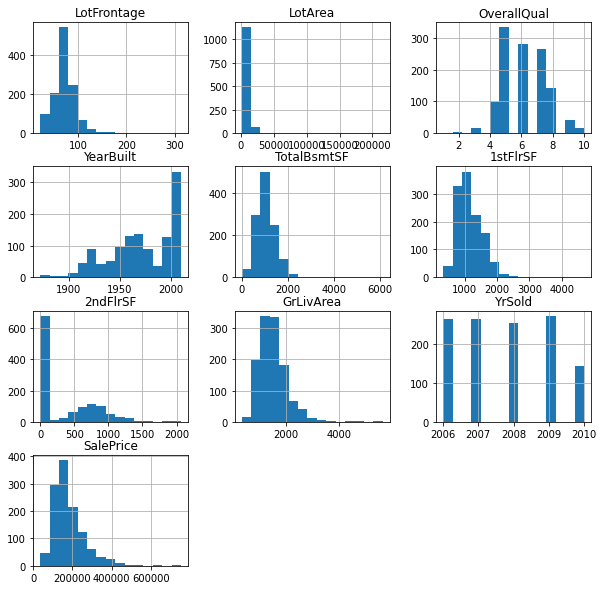

In [52]:
hist = data.hist(figsize=(10,10), bins=15)

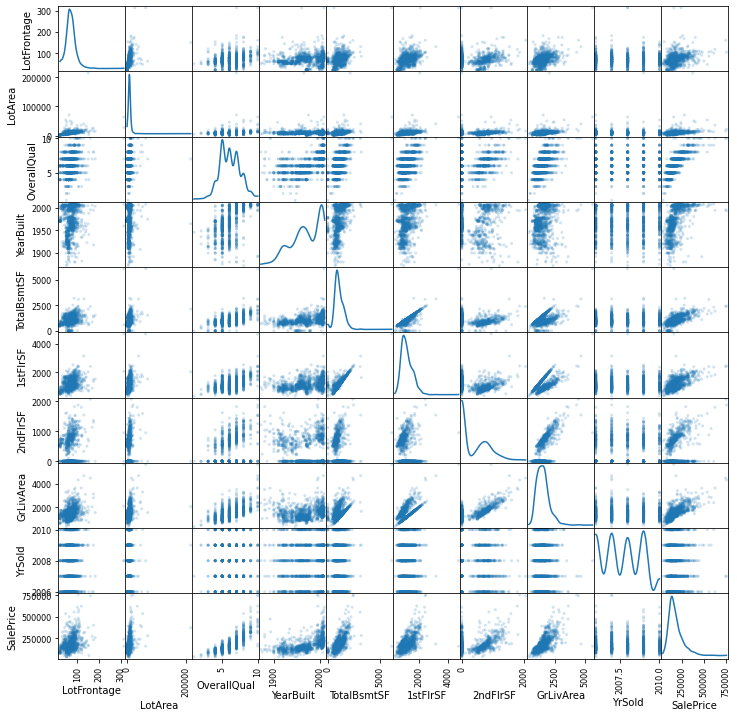

In [53]:
scat_mat = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal="kde")

Text(0.5, 1.0, 'Corelation Matrix')

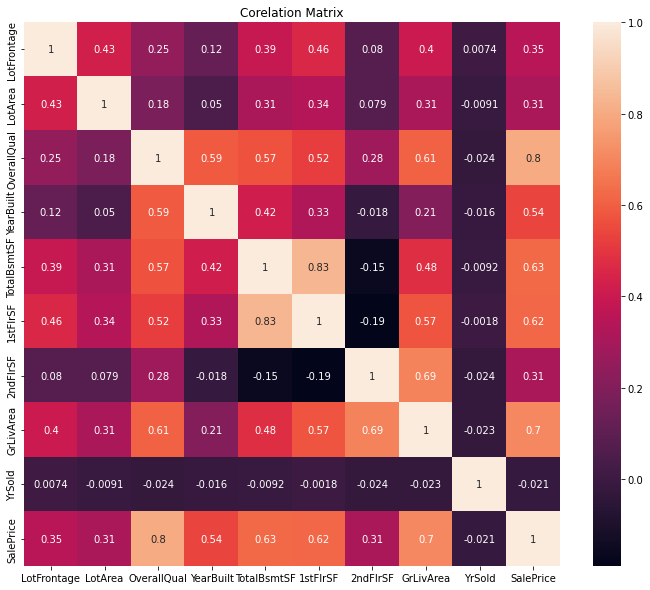

In [54]:
plt.figure(figsize=(12, 10))
corr_map = sns.heatmap(data.corr(), annot=True)
corr_map.set_title('Corelation Matrix')

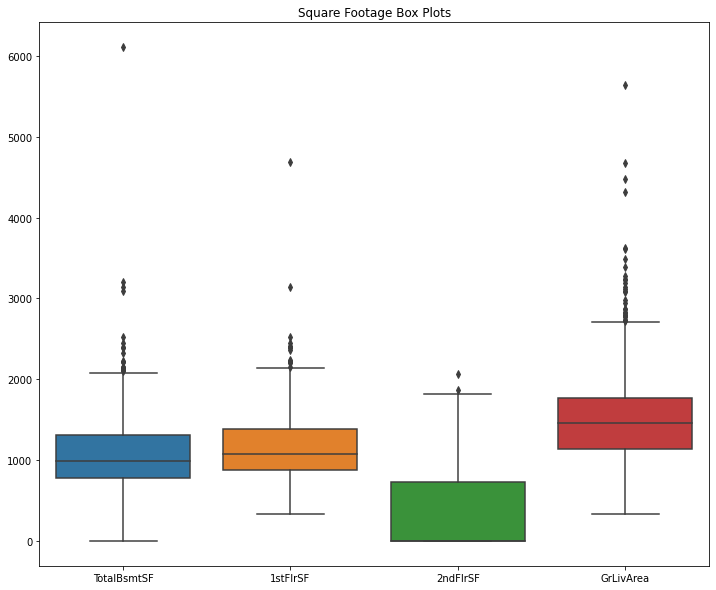

In [55]:
plt.figure(figsize=(12, 10))
plt.title('Square Footage Box Plots')
sns.boxplot(data=data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']])

In [56]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print('Training Data Shapes:\n' + 15*'-' + '\n\tX_train:', X_train.shape, '\n\ty_train:', y_train.shape, end='\n\n')
print('Testing Data Shapes:\n' + 15*'-' + '\n\tX_test:', X_test.shape, '\n\ty_test:', y_test.shape)

Training Data Shapes:
---------------
	X_train: (804, 9) 
	y_train: (804,)

Testing Data Shapes:
---------------
	X_test: (397, 9) 
	y_test: (397,)


---

#### 2. Linear Regression

---

In [57]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

coefficents = pd.DataFrame(np.insert(linreg.coef_, 0, linreg.intercept_), columns=['Coefficients'])
coefficents.index = ['w_' + str(i) for i in range(len(coefficents))]
coefficents

,Coefficients
w_0,-2.249117e+06
w_1,-4.012099e+01
w_2,1.087437e+00
w_3,2.355457e+04
w_4,5.009339e+02
w_5,1.158552e+01
w_6,8.435321e+01
w_7,6.508445e+01
w_8,-1.272207e+01
w_9,5.868498e+02


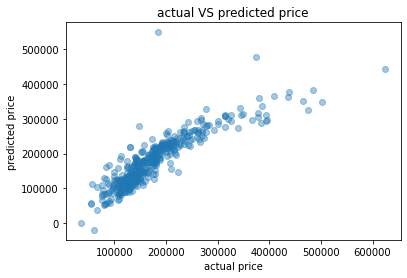

In [58]:
y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('actual VS predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [59]:
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_train)
print('Mean Absolute Error: $%.2f' % mae_train, '\n\n')

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_test)
print('Mean Absolute Error: $%.2f' % mae_test)

Training Data Metrics:
-------------------------
Mean Squared Error: $1715062976.28
Mean Absolute Error: $25875.14 


Training Data Metrics:
-------------------------
Mean Squared Error: $1515375313.85
Mean Absolute Error: $25616.65


In [60]:
compare = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred)).astype(int)})
compare.head(15)

,actual price,predicted price,absolute error
0,301500,293818,7682
1,177000,168487,8513
2,206900,208237,1337
3,394432,312629,81803
4,168000,194897,26897
5,202665,216979,14314
6,176000,171966,4034
7,221000,245273,24273
8,142500,180441,37941
9,137000,163655,26655


In [61]:
compare[['absolute error']].describe()

,absolute error
count,397.000000
mean,25616.647355
std,29348.434489
min,26.000000
25%,9033.000000
50%,19444.000000
75%,32390.000000
max,364911.000000


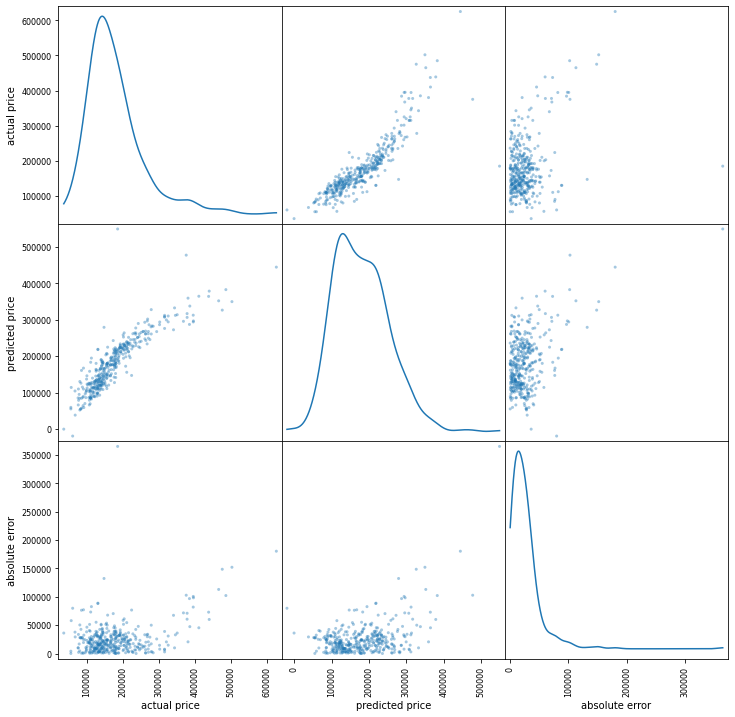

In [62]:
scatter = pd.plotting.scatter_matrix(compare, alpha=0.4, figsize=(12, 12), diagonal="kde")

---

#### 3. Polynomial Regression

---

Sk-learn does not provide an explicit polynomial regression model. So, just like with our numpy implimentation, we will create the polynomial features first, then use a standard linear regression model on these new polynomial features.

In [71]:
degree = 2 # Degree of the polynomial, try using degree 2, then degree 8 and observing the training and testing metrics for each.
poly_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)

print('X_train shape:', X_train.shape)
print('X_train_poly shape:', X_train_poly.shape)

X_train shape: (804, 9)
X_train_poly shape: (804, 54)


###### So whats up with the difference in shape?

In our base dataset we have 804 samples with 9 features. Say we create the polynomial features for a degree 2 polynomial. Then we will add an aditional feature for each combination of 2 of the original features. We start with 9 features, then add each combination of two features (an aditional 9 choose 2 = 36), then each feature squared (an aditional 9). This means we end up with a total $2(9) + 36 = 54$ features in the `x_tain_poly` dataset. This model will have 55 learnable parameters versus the previous model which had 10 learnable parameters. As such, this model will be much more complex than the previous model. 

##### Define and Fit the Polynomial Regression Model

This will be the exact same as for standard linear regression but will fit on the `X_train_poly` features instead.

In [72]:
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

LinearRegression()

In [73]:
y_pred_train_poly = polyreg.predict(X_train_poly)
y_pred_poly = polyreg.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)

mse_test_poly = mean_squared_error(y_test, y_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_poly)

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_train_poly)
print('Mean Absolute Error: $%.2f' % mae_train_poly, '\n\n')

print('Training Data Metrics:\n' + 25*'-')
print('Mean Squared Error: $%.2f' % mse_test_poly)
print('Mean Absolute Error: $%.2f' % mae_test_poly)

Training Data Metrics:
-------------------------
Mean Squared Error: $743107016.11
Mean Absolute Error: $19276.83 


Training Data Metrics:
-------------------------
Mean Squared Error: $5869657160.87
Mean Absolute Error: $25415.24


In [74]:
compare_poly = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred_poly).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred_poly)).astype(int)})
compare_poly.head(15)

,actual price,predicted price,absolute error
0,301500,318800,17300
1,177000,160559,16441
2,206900,204276,2624
3,394432,348622,45810
4,168000,136360,31640
5,202665,208490,5825
6,176000,172961,3039
7,221000,245316,24316
8,142500,180179,37679
9,137000,154504,17504


In [75]:
compare_poly[['absolute error']].describe()

,absolute error
count,3.970000e+02
mean,2.541525e+04
std,7.236652e+04
min,5.500000e+01
25%,7.215000e+03
50%,1.548300e+04
75%,2.686700e+04
max,1.183833e+06
